# <机器学习>课程 Lecture 2 实验

## 逻辑回归模型

给定一组数据,其输入维度为2,输出维度为1.完成二分类任务.

请分别使用sklearn,梯度下降法和模拟退火法来拟合.

从文件中读取数据用于后续实验.

In [115]:
import numpy as np
from sklearn.model_selection import train_test_split

data_filename = "cls_data_0303_1007_2.npy"
cls_data = np.load(data_filename)
x_data, y_data = cls_data[:, :-1], cls_data[:, -1]

x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data,
    train_size=0.8, shuffle=True,
    stratify=y_data
)

# x_data in [b, c_in]
c_in = x_data.shape[1]
# y_data in [b, c_out]
c_out = 1


首先可视化数据,观察是否是可分的.

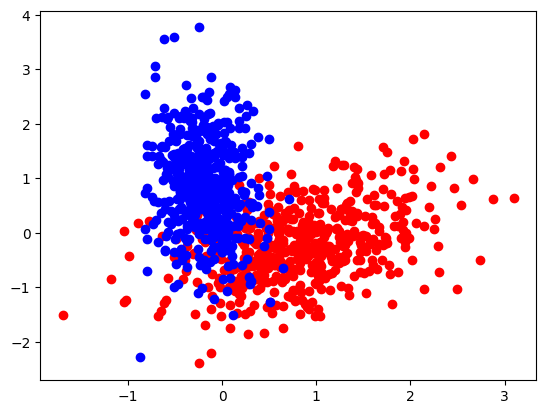

In [116]:
from matplotlib import pyplot as plt

plt.figure()

pos_data = x_data[y_data == 1, :]
neg_data = x_data[y_data == 0, :]

plt.scatter(pos_data[:, 0], pos_data[:, 1], c='red')
plt.scatter(neg_data[:, 0], neg_data[:, 1], c='blue')

plt.show()

### 使用sklearn中的线性模型拟合


In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# === 创建模型并进行拟合 ===
# model = ?
model = LogisticRegression()

# print(x_data)
# print(y_data)

# === 计算模型的分类准确率 ===

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
# accuracy =
# print(accuracy)

Accuracy: 0.875


Accuracy: 0.875


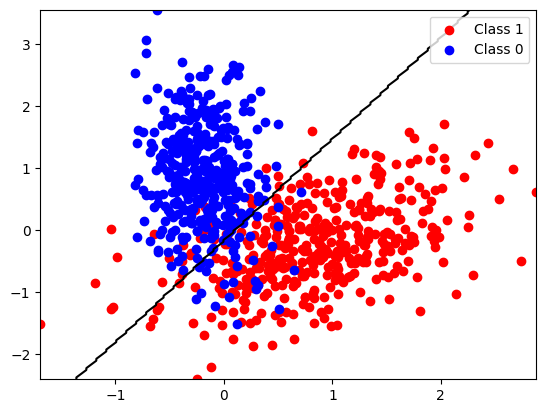

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import numpy as np

# 创建模型并进行拟合
model = LogisticRegression()

# 假设 x_train, y_train, x_test, y_test 是已经定义好的数据集
# 训练模型
model.fit(x_train, y_train)

# 预测测试集
y_pred = model.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# 可视化数据及分类线

# 获取正负类别的数据
pos_data = x_train[y_train == 1, :]
neg_data = x_train[y_train == 0, :]

# 绘制散点图
plt.scatter(pos_data[:, 0], pos_data[:, 1], c='red', label='Class 1')
plt.scatter(neg_data[:, 0], neg_data[:, 1], c='blue', label='Class 0')

# 绘制决策边界
# 创建一个网格范围来评估模型的输出
xx, yy = np.meshgrid(np.linspace(x_train[:, 0].min(), x_train[:, 0].max(), 200),
                     np.linspace(x_train[:, 1].min(), x_train[:, 1].max(), 200))

# 通过模型预测网格点的类别
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# 将预测结果重塑为网格的形状
Z = Z.reshape(xx.shape)

# 绘制决策边界
plt.contour(xx, yy, Z, levels=[0.5], cmap="gray")

# 显示图例
plt.legend()
plt.show()

### 参考之前线性模型实验的代码,实现梯度下降拟合

In [119]:
import numpy as np

# Sigmoid 函数：将输入值映射到 0 到 1 之间
def sigmoid(val: np.ndarray) -> np.ndarray:
    """Sigmoid function"""
    return 1 / (1 + np.exp(-val))


class LogisticRegression():
    """
    Logistic Regression using Gradient Descent
    """
    def __init__(self, x: np.ndarray, y: np.ndarray,
                 init_mean: float, init_var: float,
                 bias: bool=True) -> None:
        # 从数据中推导出输入特征数和输出类别数
        self.c_in = x.shape[1]  # 输入特征的数量
        self.c_out = y.shape[1] if len(y.shape) > 1 else 1  # 输出类别的数量，二分类时为1

        self.bias = bias
        # 权重初始化为随机值，服从均值为init_mean，方差为init_var的正态分布
        self.weights = np.random.normal(loc=init_mean, scale=init_var, size=(self.c_in, self.c_out))
        # 偏置初始化为零
        if bias:
            self.bias_term = np.zeros((1, self.c_out))
        else:
            self.bias_term = None

    def predict(self, x: np.ndarray, weight: np.ndarray=None) -> np.ndarray:
        """
        Predict the output based on input x and model weights.
        :param x: input features, shape (n_samples, n_features)
        :param weight: model weights, shape (n_features, n_outputs), optional
        :return: predicted probabilities, shape (n_samples, n_outputs)
        """
        if weight is None:
            weight = self.weights

        # 计算加权和，并应用 Sigmoid 函数
        z = np.dot(x, weight) + self.bias_term
        # print(sigmoid(z).shape)
        return sigmoid(z)

    def fit_gradient_descent(self, x: np.ndarray, y: np.ndarray,
                             step: float=0.01, iteration: int=1000) -> None:
        """
        Train the Logistic Regression model using Gradient Descent
        :param x: input features, shape (n_samples, n_features)
        :param y: target labels, shape (n_samples, n_outputs)
        :param step: learning rate for gradient descent
        :param iteration: number of iterations for gradient descent
        :return: None
        """
        m = x.shape[0]  # 样本数量
        for i in range(iteration):
            # 预测概率值
            predictions = self.predict(x)
            y = y.reshape(-1,1)
            # print(x.shape)
            # print(predictions.shape)
            # print(y.shape)
            # print(self.weights.shape)
            # print(x.T.shape)
            # print((predictions-y).shape)
            # 计算损失的梯度
            # gradient_w 的形状是 (n_features, n_outputs)

            gradient_w = np.dot(x.T, (predictions - y)) / m  # 权重的梯度
            # print(gradient_w.shape)
            if self.bias_term is not None:
                gradient_b = np.sum(predictions - y, axis=0, keepdims=True) / m  # 偏置的梯度
            else:
                gradient_b = 0

            # 更新权重和偏置
            self.weights -= step * gradient_w
            if self.bias_term is not None:
                self.bias_term -= step * gradient_b

            # # 每隔一定步数打印损失（可以帮助调试）
            # if i % 10 == 0:
            #     loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
            #     print(f"Iteration {i}, Loss: {loss:.4f}")

In [120]:
# === 创建模型并进行拟合 ===
model = LogisticRegression(x_train, y_train, 100, 1000)

# === 计算模型的分类准确率 ===
model.fit_gradient_descent(x_train, y_train)
y_pred = model.predict(x_test)
# print(y_pred.shape)
# print(y_test.shape)
# y_pred = y_pred.reshape(-1)
# y_test = y_test.reshape(-1)
y_pred_labels = (y_pred >= 0.5).astype(int)
print(f"Accuracy: {accuracy_score(y_test, y_pred_labels)}")
# accuracy =
# print(accuracy)


Accuracy: 0.25


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14784\3037040813.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-val))


Accuracy: 0.87


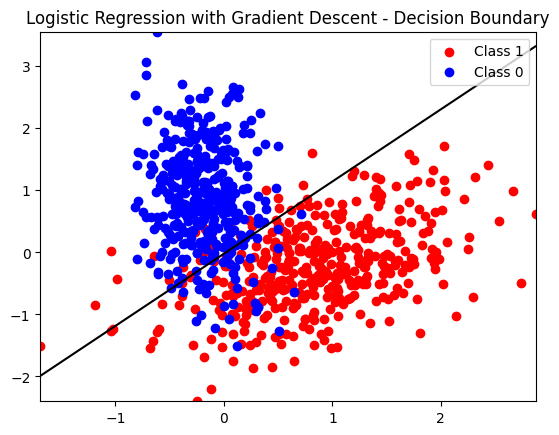

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# 假设 LogisticRegression 已经定义并实现了 fit_gradient_descent 和 predict

# === 创建模型并进行拟合 ===
model = LogisticRegression(x_train, y_train, 0, 0.1)  # 假设模型已初始化

# 使用梯度下降训练模型
model.fit_gradient_descent(x_train, y_train)

# === 计算模型的分类准确率 ===
y_pred = model.predict(x_test)
y_pred_labels = (y_pred >= 0.5).astype(int)  # 将概率转化为 0 或 1
print(f"Accuracy: {accuracy_score(y_test, y_pred_labels)}")

# === 可视化数据点和分类线 ===
# 获取正类和负类的数据
pos_data = x_train[y_train == 1, :]
neg_data = x_train[y_train == 0, :]

# 绘制正类和负类的数据点
plt.scatter(pos_data[:, 0], pos_data[:, 1], c='red', label='Class 1')
plt.scatter(neg_data[:, 0], neg_data[:, 1], c='blue', label='Class 0')

# 绘制决策边界
# 创建一个网格范围来评估模型的输出
xx, yy = np.meshgrid(np.linspace(x_train[:, 0].min(), x_train[:, 0].max(), 200),
                     np.linspace(x_train[:, 1].min(), x_train[:, 1].max(), 200))

# 通过模型预测网格点的类别
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# 将预测结果重塑为网格的形状
Z = Z.reshape(xx.shape)

# 绘制决策边界
plt.contour(xx, yy, Z, levels=[0.5], cmap="gray")

# 显示图例
plt.legend()
plt.title("Logistic Regression with Gradient Descent - Decision Boundary")
plt.show()

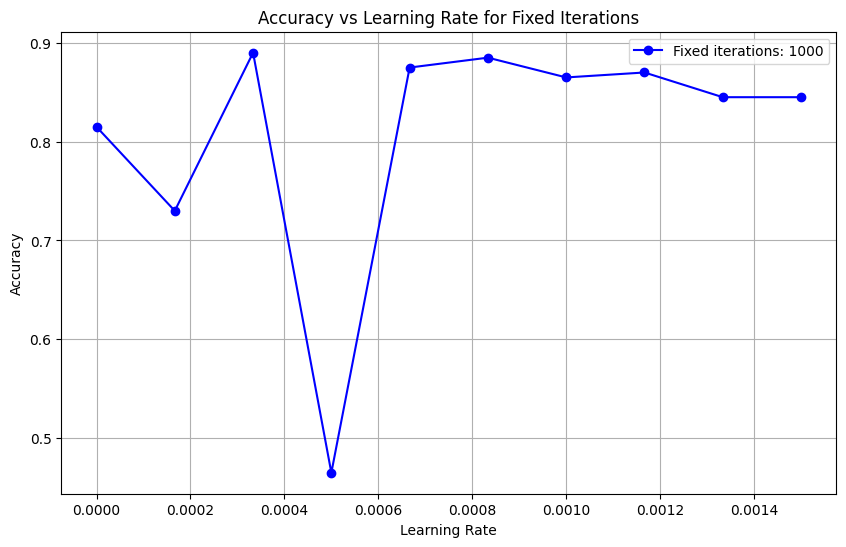

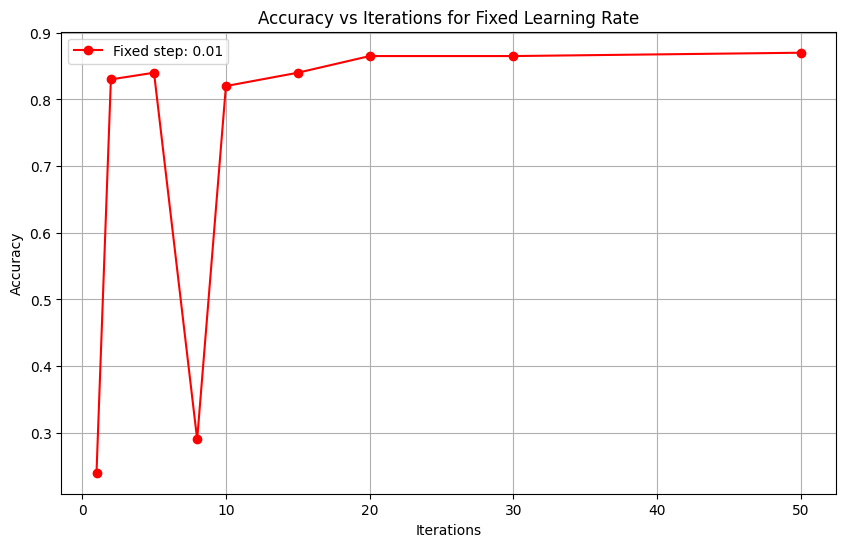

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Sigmoid function
def sigmoid(val: np.ndarray) -> np.ndarray:
    """Sigmoid function"""
    return 1 / (1 + np.exp(-val))

# Logistic Regression class with gradient descent method
class LogisticRegression:
    """
    Logistic Regression using Gradient Descent
    """
    def __init__(self, x: np.ndarray, y: np.ndarray,
                 init_mean: float, init_var: float,
                 bias: bool=True) -> None:
        self.c_in = x.shape[1]  # Number of input features
        self.c_out = y.shape[1] if len(y.shape) > 1 else 1  # Number of output classes

        self.bias = bias
        self.weights = np.random.normal(loc=init_mean, scale=init_var, size=(self.c_in, self.c_out))
        if bias:
            self.bias_term = np.zeros((1, self.c_out))
        else:
            self.bias_term = None

    def predict(self, x: np.ndarray) -> np.ndarray:
        """Predict the output based on input x"""
        z = np.dot(x, self.weights) + (self.bias_term if self.bias else 0)
        return sigmoid(z)

    def fit_gradient_descent(self, x: np.ndarray, y: np.ndarray,
                             step: float=0.01, iteration: int=1000) -> None:
        """
        Train the Logistic Regression model using Gradient Descent
        :param x: input features, shape (n_samples, n_features)
        :param y: target labels, shape (n_samples, n_outputs)
        :param step: learning rate for gradient descent
        :param iteration: number of iterations for gradient descent
        :return: None
        """
        m = x.shape[0]  # Number of samples
        for i in range(iteration):
            predictions = self.predict(x)
            y = y.reshape(-1, 1)

            # Calculate gradients
            gradient_w = np.dot(x.T, (predictions - y)) / m  # Gradient of weights
            gradient_b = np.sum(predictions - y, axis=0, keepdims=True) / m if self.bias_term is not None else 0

            # Update weights and biases
            self.weights -= step * gradient_w
            if self.bias_term is not None:
                self.bias_term -= step * gradient_b


# Experiment: Fixed iteration and varying learning rate
iterations = 1000  # Fixed number of iterations
learning_rates = np.linspace(0, 0.0015, 10)  # Varying learning rates
accuracies_all = {}

# print(x_train.shape)
# print(y_train.shape)

# For each learning rate, calculate accuracy for fixed iteration
for lr in learning_rates:
    model = LogisticRegression(x_train, y_train, init_mean=0, init_var=0.1)
    model.fit_gradient_descent(x_train, y_train, step=lr, iteration=iterations)
    y_pred = model.predict(x_test)
    y_pred_labels = (y_pred >= 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred_labels)
    accuracies_all[lr] = accuracy

# Plot accuracy vs. learning rate for fixed iterations
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, list(accuracies_all.values()), marker='o', color='blue', label=f'Fixed iterations: {iterations}')
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Learning Rate for Fixed Iterations")
plt.grid(True)
plt.legend()
plt.show()

# Experiment: Fixed learning rate and varying iteration count
step = 0.01  # Fixed learning rate
iterations_list = [1,2,5,8,10,15,20,30,50]  # Varying iteration counts
accuracies_all_iter = {}

# For each iteration count, calculate accuracy for fixed learning rate
for iterations in iterations_list:
    model = LogisticRegression(x_train, y_train, init_mean=0, init_var=0.1)
    model.fit_gradient_descent(x_train, y_train, step=step, iteration=iterations)
    y_pred = model.predict(x_test)
    y_pred_labels = (y_pred >= 0.5).astype(int)
    # print(y_pred_labels)
    accuracy = accuracy_score(y_test, y_pred_labels)
    # print(accuracy)
    accuracies_all_iter[iterations] = accuracy

# Plot accuracy vs. iterations for fixed learning rate
plt.figure(figsize=(10, 6))
plt.plot(iterations_list, list(accuracies_all_iter.values()), marker='o', color='red', label=f'Fixed step: {step}')
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Iterations for Fixed Learning Rate")
plt.grid(True)
plt.legend()
plt.show()

### 参考之前线性模型实验的代码,实现模拟退火法拟合

#0/30, temp=0.090, loss=1.4394, accu=0.9025
#1/30, temp=0.081, loss=1.4185, accu=0.9050
#2/30, temp=0.073, loss=1.4185, accu=0.9050
#3/30, temp=0.066, loss=1.4185, accu=0.9050
#4/30, temp=0.059, loss=1.4185, accu=0.9050
#5/30, temp=0.053, loss=1.3793, accu=0.9050
#6/30, temp=0.048, loss=1.3705, accu=0.9038
#7/30, temp=0.043, loss=1.3705, accu=0.9038
#8/30, temp=0.039, loss=1.3705, accu=0.9038
#9/30, temp=0.035, loss=1.3705, accu=0.9038
#10/30, temp=0.031, loss=1.3624, accu=0.9087
#11/30, temp=0.028, loss=1.3530, accu=0.9087
#12/30, temp=0.025, loss=1.3530, accu=0.9087
#13/30, temp=0.023, loss=1.3526, accu=0.9075
#14/30, temp=0.021, loss=1.3526, accu=0.9075
#15/30, temp=0.019, loss=1.3526, accu=0.9075
#16/30, temp=0.017, loss=1.3526, accu=0.9075
#17/30, temp=0.015, loss=1.3526, accu=0.9075
#18/30, temp=0.014, loss=1.3502, accu=0.9087
#19/30, temp=0.012, loss=1.3489, accu=0.9087
#20/30, temp=0.011, loss=1.3489, accu=0.9087
#21/30, temp=0.010, loss=1.3396, accu=0.9087
#22/30, temp=0.009, 

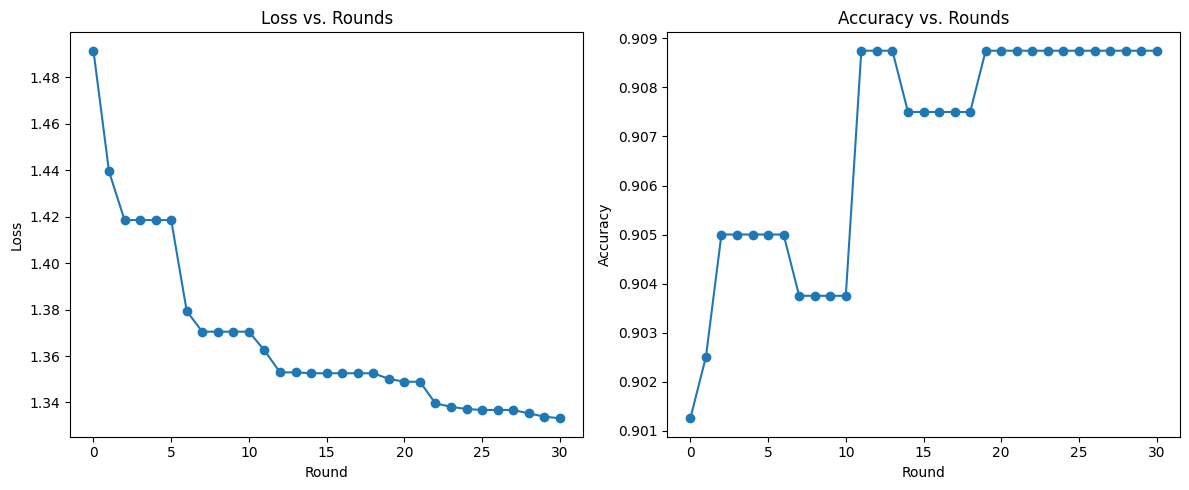

Train Accuracy: 0.90875
Test Accuracy: 0.92


In [123]:
import numpy as np
from sklearn.model_selection import train_test_split
from copy import deepcopy
import matplotlib.pyplot as plt  # 新增导入

# 数据加载和预处理部分保持不变
data_filename = "cls_data_0303_1007_2.npy"
cls_data = np.load(data_filename)
x_data, y_data = cls_data[:, :-1], cls_data[:, -1]

x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data,
    train_size=0.8, shuffle=True,
    stratify=y_data
)

class LogisticRegression:
    # LogisticRegression类保持不变
    def __init__(self, x: np.ndarray, y: np.ndarray,
                 init_mean: float, init_var: float,
                 bias: bool = True) -> None:
        self.c_in = x.shape[1]
        self.c_out = y.shape[1] if len(y.shape) > 1 else 1
        self.bias = bias
        self.weights = np.random.normal(loc=init_mean, scale=init_var, size=(self.c_in, self.c_out))
        self.bias_term = np.zeros((1, self.c_out)) if bias else None

    def predict(self, x: np.ndarray) -> np.ndarray:
        z = np.dot(x, self.weights) + (self.bias_term if self.bias else 0)
        return 1 / (1 + np.exp(-z))  # Sigmoid

    def fit_gradient_descent(self, x: np.ndarray, y: np.ndarray,
                             step: float = 0.01, iteration: int = 1000) -> None:
        m = x.shape[0]
        for _ in range(iteration):
            predictions = self.predict(x)
            y_reshaped = y.reshape(-1, 1)
            gradient_w = np.dot(x.T, (predictions - y_reshaped)) / m
            if self.bias_term is not None:
                gradient_b = np.sum(predictions - y_reshaped, axis=0, keepdims=True) / m
                self.bias_term -= step * gradient_b
            self.weights -= step * gradient_w

class SimulatedAnnealing:
    def __init__(self, c_in, c_out, init_mean, init_val, bias) -> None:
        # 假初始化，实际数据在fit时传入
        dummy_x = np.zeros((1, c_in))
        dummy_y = np.zeros((1, c_out))
        self.model = LogisticRegression(dummy_x, dummy_y, init_mean, init_val, bias)

    def nll_loss(self, logits, label):
        eps = 1e-8  # 避免log(0)
        logits = np.clip(logits, eps, 1 - eps)  # 数值稳定性处理
        return -np.mean(label * np.log(logits) + (1 - label) * np.log(1 - logits))

    def accuracy(self, logits, label):
        preds = (logits > 0.5).astype(int)
        return np.mean(preds == label.reshape(-1, 1))

    def fit(self, x, y, step=0.01, iterations=100, rounds=10, init_temp=1):
        # 初始化模型权重（适配真实数据维度）
        self.model.c_in = x.shape[1]
        self.model.weights = np.random.normal(loc=0, scale=0.1, size=(x.shape[1], 1))
        if self.model.bias_term is not None:
            self.model.bias_term = np.zeros((1, 1))

        # 预训练
        self.model.fit_gradient_descent(x, y, step, iterations)

        # 初始化最优状态和历史记录
        best_model = deepcopy(self.model)
        best_loss = self.nll_loss(best_model.predict(x), y)
        best_accu = self.accuracy(best_model.predict(x), y)
        history_loss = [best_loss]  # 记录初始状态
        history_accu = [best_accu]

        temp = init_temp
        for round_idx in range(rounds):
            temp *= 0.9
            cur_model = deepcopy(best_model)

            # 添加扰动
            perturb = np.random.normal(scale=temp, size=cur_model.weights.shape)
            cur_model.weights += perturb
            if cur_model.bias_term is not None:
                cur_model.bias_term += np.random.normal(scale=temp, size=cur_model.bias_term.shape)

            # 计算新状态损失
            cur_logits = cur_model.predict(x)
            cur_loss = self.nll_loss(cur_logits, y)
            cur_accu = self.accuracy(cur_logits, y)

            delta = cur_loss - best_loss
            if delta < 0:
                best_model = deepcopy(cur_model)
                best_loss = cur_loss
                best_accu = cur_accu

            # 记录历史
            history_loss.append(best_loss)
            history_accu.append(best_accu)
            print(f"#{round_idx}/{rounds}, temp={temp:.3f}, loss={best_loss:.4f}, accu={best_accu:.4f}")

        # 绘制图表
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history_loss, 'o-', label='Best Loss')
        plt.xlabel('Round')
        plt.ylabel('Loss')
        plt.title('Loss vs. Rounds')

        plt.subplot(1, 2, 2)
        plt.plot(history_accu, 'o-', label='Best Accuracy')
        plt.xlabel('Round')
        plt.ylabel('Accuracy')
        plt.title('Accuracy vs. Rounds')

        plt.tight_layout()
        plt.show()

        self.model = best_model

# 训练和测试
model = SimulatedAnnealing(x_train.shape[1], 1, 0, 0.1, True)
model.fit(x_train, y_train, step=0.05, iterations=1000, rounds=30, init_temp=0.1)

print("Train Accuracy:", model.accuracy(model.model.predict(x_train), y_train))
print("Test Accuracy:", model.accuracy(model.model.predict(x_test), y_test))